In [3]:
import pickle
import os
import re
import fnmatch
import numpy as np
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def read_all_rotations(dirname, filebase):
    '''Read results from dirname from files matching filebase'''

    # The set of files in the directory
    files = fnmatch.filter(os.listdir(dirname), filebase)
    files.sort()
    results = []
    # Loop over matching files
    for f in files:
        fp = open("%s/%s"%(dirname,f), "rb")
        r = pickle.load(fp)
        fp.close()
        results.append(r)
    
    return results

# Training and Validation Curves

In [95]:
filebase = ("amino_round4_MaxPool__epochs_2__att_5_5_hidden_15_drop_0-300_L2_0-000100_LR_0-001000_ntrain_03_rot_*_results.pkl") #Select this ntraining number resultsresultsList = read_all_rotations('results/P1', filebase) #Read all of those into resultsList
resultsList = read_all_rotations('results', filebase) #Read all of those into resultsList


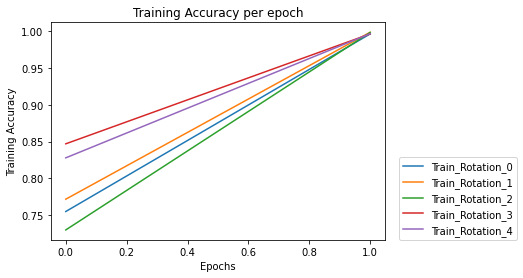

In [99]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['sparse_categorical_accuracy'], label=(("Train_Rotation_%s")%(str(i))))

plt.ylabel('Training Accuracy')
plt.xlabel('Epochs')
plt.title("Training Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure1.png')
plt.show()

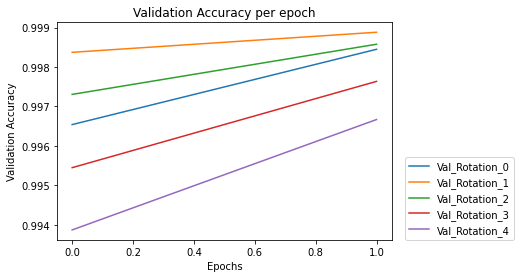

In [97]:
for i in range(len(resultsList)):
    plt.plot(resultsList[i]['history']['val_sparse_categorical_accuracy'], label=(("Val_Rotation_%s")%(str(i))))

plt.ylabel('Validation Accuracy')
plt.xlabel('Epochs')
plt.title("Validation Accuracy per epoch")
plt.legend(loc=(1.04,0))
plt.savefig('Figure2.png')
plt.show()

# Histograms of Test Results

In [22]:
def getResults(resultsList, index):
    trainList = [] # Create an empty list to hold values
    valList = [] # Create an empty list to hold values
    testList = [] # Create an empty list to hold values

    for i in range(len(resultsList)): # For each result in the 5 rotations
        trainList.append(resultsList[i]['predict_training_eval'][index]) 
        valList.append(resultsList[i]['predict_validation_eval'][index]) 
        testList.append(resultsList[i]['predict_testing_eval'][index]) 
    
    return trainList, valList, testList
    

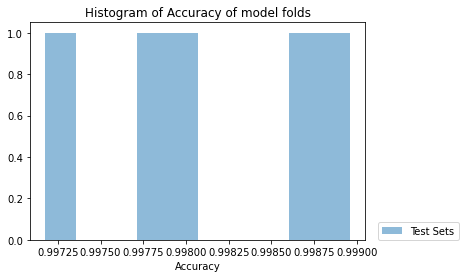

In [98]:
trainList, valList, testList = getResults(resultsList, 1)


plt.hist([testList], bins=10, alpha=0.5, label=['Test Sets'])
#plt.hist([complexModel], bins=10, alpha=0.5, label=['Complex Model'])
#plt.axvline(np.mean(testAcc), color='k', linestyle='dashed', linewidth=1, label='Mean Acc')
plt.legend(loc=(1.04,0))
plt.xlabel('Accuracy')
plt.title("Histogram of Accuracy of model folds")
plt.savefig('Figure3.png')
plt.show()

In [13]:
fname='radiant_earth/pa/pa_1m_2013_extended-train_patches/F0/test.npz'

In [14]:
# Load data
fname = fname.numpy().decode('utf-8')
    
dat = np.load(fname)

AttributeError: 'str' object has no attribute 'numpy'

In [9]:
dat

In [10]:
# image to be examined
ind = 1

# This shows the raw first image of the dataset in channel 0-3 (RGB)
plt.imshow(dat[ind, 0:3, :,:]) 

# This shows the predicted labels of the pixels of the first image
#plt.imshow(labels[ind,:,:]) 

# This shows the actual labels of the first image in the dataset
#plt.imshow(outs[ind,:,:]) 

TypeError: not all arguments converted during string formatting